## Methodology
This project will follow the CRISP_DM methodology:

>> Business understanding  
>> Data Understanding  
>> Data preparation  
>> Modeling  
>> Evaluation  
>> Deployment  

## 1. Business Understanding

### 1.1 Project Overview

Loan defaults represent a substantial risk to financial institutions, leading to potential revenue loss and liquidity issues. Using historical loan data we can be able to formulate machine learning models that can be able to predict the likelihood of borrowers defaulting. This will enables lenders to make data-driven decisions, optimizing risk management and improving profitability.

### 1.2 Business Problem

Lender’s struggle with assessing default risks through using traditional methods, which often fail to provide crucial information of the borrower. That why this project aims to address this challenge by leveraging machine learning techniques which will predict loan defaults to minimize financial risk and improve loan approval processes.

### 1.3	Project Objectives

> * Develop a machine learning solution to predict whether a borrower will default on their loan based on historical and demographic data.
> * Identify the key factors influencing loan defaults.
> * Compare the performance of different machine learning models (Logistic Regression, Decision Tree, and Random Forest).
> * Provide actionable insights to financial institutions to mitigate default risks.





## 2. Data Understanding

### 2.1	Data Source

This dataset contains information about customer loans, including customer demographics, loan details, and default status. The dataset can be used for various data analysis and machine learning tasks, such as predicting loan default risk. The dataset consists of the following columns. download dataset [Here](https://www.kaggle.com/datasets/prakashraushan/loan-dataset)

### 2.2 Data Description

> * customer_id: Unique identifier for each customer
> * customer_age: Age of the customer
> * customer_income: Annual income of the customer
> * home_ownership: Home ownership status (e.g., RENT, OWN, MORTGAGE)
> * employment_duration: Duration of employment in months
> * loan_intent: Purpose of the loan (e.g., PERSONAL, EDUCATION, MEDICAL, VENTURE)
> * loan_grade: Grade assigned to the loan
> * loan_amnt: Loan amount requested
> * loan_int_rate: Interest rate of the loan
> * term_years: Loan term in years
> * historical_default: Indicates if the customer has a history of default (Y/N)
> * cred_hist_length: Length of the customer's credit history in years
> * Current_loan_status: Current status of the loan (DEFAULT, NO DEFAULT)


## 3. Data Prepration

### 3.1 Exploratory Data Analysis

In [1]:
# import relevant libraries
import csv 
import pandas as pd 
import seaborn as sns
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

# Filtering future warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading dataset
data = pd.read_csv("LoanDataset - LoansDatasest.csv")
#Preview the first 5 rows
data.head()

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
0,1.0,22,59000,RENT,123.0,PERSONAL,C,"£35,000.00",16.02,10,Y,3,DEFAULT
1,2.0,21,9600,OWN,5.0,EDUCATION,A,"£1,000.00",11.14,1,NaN,2,NO DEFAULT
2,3.0,25,9600,MORTGAGE,1.0,MEDICAL,B,"£5,500.00",12.87,5,N,3,DEFAULT
3,4.0,23,65500,RENT,4.0,MEDICAL,B,"£35,000.00",15.23,10,N,2,DEFAULT
4,5.0,24,54400,RENT,8.0,MEDICAL,B,"£35,000.00",14.27,10,Y,4,DEFAULT


In [3]:
#checking some data background
print(f"The shape of the data is {data.shape}")

The shape of the data is (32586, 13)


In [4]:
display(data.columns)
# renaming columns
data.rename(columns={'Current_loan_status':'default'}, inplace=True)
# preview
display(data.columns)

Index(['customer_id', 'customer_age', 'customer_income', 'home_ownership',
       'employment_duration', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'term_years', 'historical_default', 'cred_hist_length',
       'Current_loan_status'],
      dtype='object')

Index(['customer_id', 'customer_age', 'customer_income', 'home_ownership',
       'employment_duration', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'term_years', 'historical_default', 'cred_hist_length',
       'default'],
      dtype='object')

In [5]:
#checking the info 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32586 entries, 0 to 32585
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          32583 non-null  float64
 1   customer_age         32586 non-null  int64  
 2   customer_income      32586 non-null  object 
 3   home_ownership       32586 non-null  object 
 4   employment_duration  31691 non-null  float64
 5   loan_intent          32586 non-null  object 
 6   loan_grade           32586 non-null  object 
 7   loan_amnt            32585 non-null  object 
 8   loan_int_rate        29470 non-null  float64
 9   term_years           32586 non-null  int64  
 10  historical_default   11849 non-null  object 
 11  cred_hist_length     32586 non-null  int64  
 12  default              32582 non-null  object 
dtypes: float64(3), int64(3), object(7)
memory usage: 3.2+ MB


In [6]:
# Converting the columns from object to num dtype
data['customer_income'] = pd.to_numeric(data['customer_income'], errors='coerce')
data['loan_amnt'] = pd.to_numeric(data['loan_amnt'], errors='coerce')

In [7]:
# checking the datatypes
data.dtypes

customer_id            float64
customer_age             int64
customer_income        float64
home_ownership          object
employment_duration    float64
loan_intent             object
loan_grade              object
loan_amnt              float64
loan_int_rate          float64
term_years               int64
historical_default      object
cred_hist_length         int64
default                 object
dtype: object

In [8]:
# Checking the distributionstatiscs of our dataset
data.describe()

,customer_id,customer_age,customer_income,employment_duration,loan_amnt,loan_int_rate,term_years,cred_hist_length
count,32583.000000,32586.000000,3.258200e+04,31691.000000,0.0,29470.000000,32586.000000,32586.000000
mean,16289.497806,27.732769,6.606723e+04,4.790161,NaN,11.011553,4.761738,5.804026
std,9405.919628,6.360528,6.197290e+04,4.142746,NaN,3.240440,2.471107,4.055078
min,1.000000,3.000000,4.000000e+03,0.000000,NaN,5.420000,1.000000,2.000000
25%,8144.500000,23.000000,3.850000e+04,2.000000,NaN,7.900000,3.000000,3.000000
50%,16288.000000,26.000000,5.500000e+04,4.000000,NaN,10.990000,4.000000,4.000000
75%,24433.500000,30.000000,7.920000e+04,7.000000,NaN,13.470000,7.000000,8.000000
max,32581.000000,144.000000,6.000000e+06,123.000000,NaN,23.220000,10.000000,30.000000


### 3.2  Data Preprocessing

>1. Dropping irrelevant columns
>2. Handle Missing values
>3. check for Duplicates and drop them
>4. check for Outliers

In [9]:
# assign a irrevant colmns
drop_col = ["employment_duration", "historical_default", "customer_id", "loan_amnt"]
# drop 
data.drop(columns=drop_col, inplace=True)
#preview remaining columns
data.columns

Index(['customer_age', 'customer_income', 'home_ownership', 'loan_intent',
       'loan_grade', 'loan_int_rate', 'term_years', 'cred_hist_length',
       'default'],
      dtype='object')

In [10]:
#checking for missing values
display(data.isnull().sum())

print(f"The dataset has {data.isnull().sum().sum()} missing values")

customer_age           0
customer_income        4
home_ownership         0
loan_intent            0
loan_grade             0
loan_int_rate       3116
term_years             0
cred_hist_length       0
default                4
dtype: int64

The dataset has 3124 missing values


In [11]:
# dropping missing values
data.dropna(inplace=True)
# Preview if the missing values have been dropped
print(f"The dataset has {data.isnull().sum().sum()} missing values")

The dataset has 0 missing values


In [12]:
# Checking for duplicates
display(data.duplicated().sum())

print(f"The dataset has {data.duplicated().sum().sum()} duplicated rows")

199

The dataset has 199 duplicated rows


In [13]:
# dropping duplicates
data.drop_duplicates(inplace=True)
#preview if duplicates have been dropped
print(f"The dataset has {data.duplicated().sum().sum()} duplicated rows")

The dataset has 0 duplicated rows


In [14]:
# Checking and dropping outliers
# defining a function
def remove_outliers(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

# assign numerical columns a variablename
num_col = ['customer_age', 'customer_income', 'loan_int_rate', 'term_years', 'cred_hist_length']

# Remove outliers
loan_data = remove_outliers(data, num_col)

In [15]:
#preview the shape 
print(f"Previously the shape of the dataset was {data.shape}, the new shape after removing outlier values is {loan_data.shape}")

Previously the shape of the dataset was (29265, 9), the new shape after removing outlier values is (25703, 9)


In [16]:
# checking the distribution of the target variable
print(f"Checking how the Default (Target variable)is distributed {loan_data['default'].value_counts()}")

Checking how the Default (Target variable)is distributed default
NO DEFAULT    20072
DEFAULT        5631
Name: count, dtype: int64


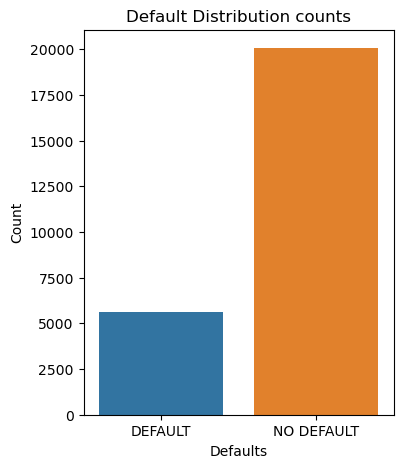

In [17]:
""" 
The distribution of the Default target variable indicates that 20072 instances
where customer did not default on the loan and 5631 instances where the customer
defaulted on the loan. below is a visualization of defaults. 
"""
# countplot of the countplot features
plt.figure(figsize=(4, 5))
sns.countplot(data=loan_data, x='default')
plt.title('Default Distribution counts')
plt.xlabel('Defaults')
plt.ylabel('Count')
plt.show()

In [18]:
# Checking the final info dataset
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25703 entries, 0 to 32299
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_age      25703 non-null  int64  
 1   customer_income   25703 non-null  float64
 2   home_ownership    25703 non-null  object 
 3   loan_intent       25703 non-null  object 
 4   loan_grade        25703 non-null  object 
 5   loan_int_rate     25703 non-null  float64
 6   term_years        25703 non-null  int64  
 7   cred_hist_length  25703 non-null  int64  
 8   default           25703 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 2.0+ MB


### 3.3 Univariate Analysis

splitting the data to and assigning them variable names that is numerical column and categorical columns

In [19]:
# Splitting data into numberic and categorical features
#Numeric colums
num_col = loan_data.select_dtypes(include=['int64', 'float64'])
display(num_col.columns)

#CATEGORICAL COLUMNS
categ_col = loan_data.select_dtypes(include=['object', 'bool'])
display(categ_col.columns)

Index(['customer_age', 'customer_income', 'loan_int_rate', 'term_years',
       'cred_hist_length'],
      dtype='object')

Index(['home_ownership', 'loan_intent', 'loan_grade', 'default'], dtype='object')

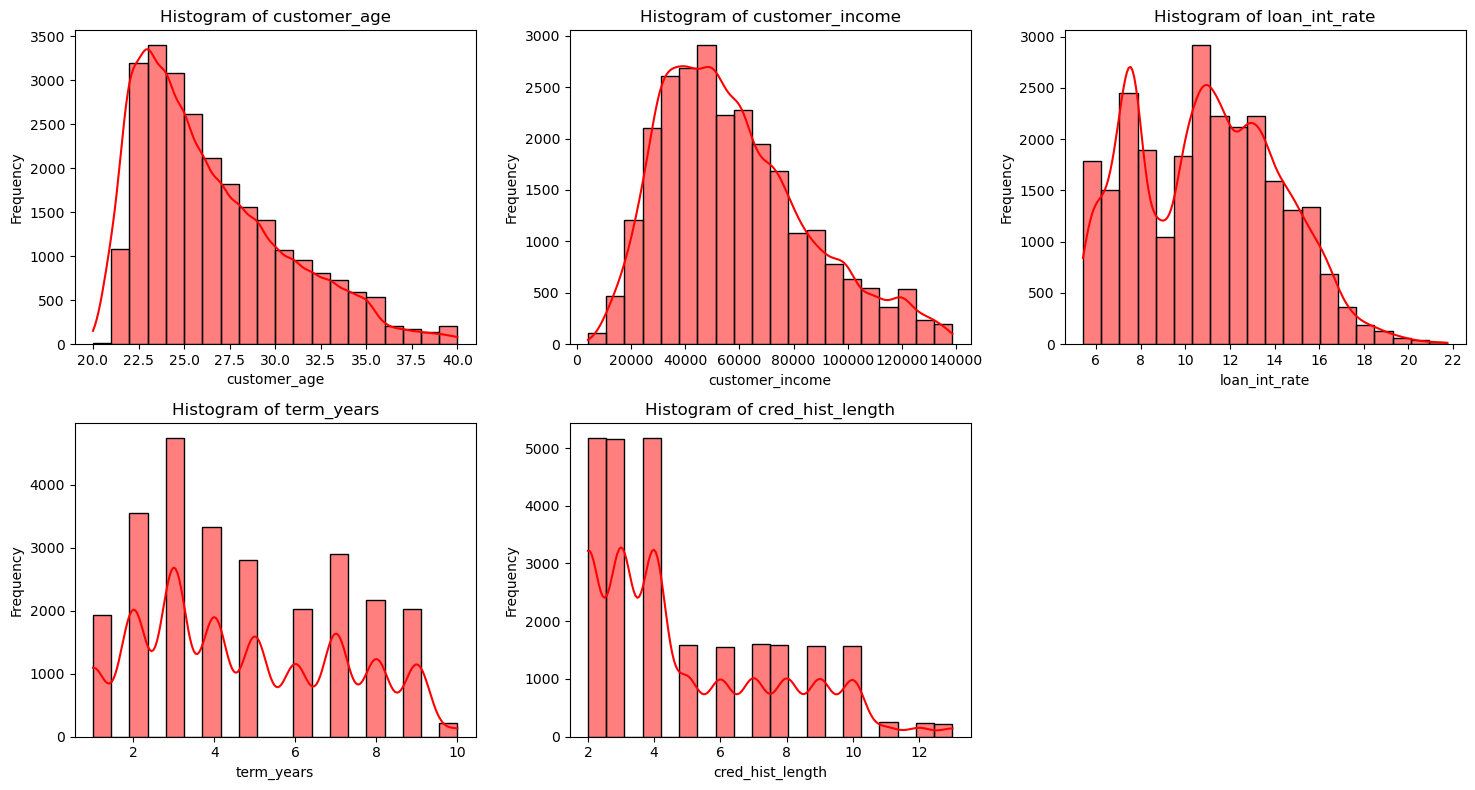

In [20]:
"""
Creating a grid of histograms and Kernel Density Estimations (KDEs) for each numeric column
this will help to better understand the distribution and characteristics of the data 
before moving on to further analysis or modeling
"""
# map number of plots in each row
subplots_per_row = 3
num_subplots = num_col.shape[1]
num_rows = (num_subplots + subplots_per_row - 1) // subplots_per_row

# plotting the subplots
fig, axes = plt.subplots(num_rows, subplots_per_row, figsize=(15, 4 * num_rows))
axes = axes.flatten()

# Plotting histograms with KDE together
for i, column in enumerate(num_col.columns):
    sns.histplot(num_col[column], bins=20, kde=True, ax=axes[i], color='red')
    axes[i].set_title(f'Histogram of {column}') 
    axes[i].set_xlabel(column)  
    axes[i].set_ylabel('Frequency')

# Removes excess subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


#### 3.3.1 Graph summary
> * Customer age is right-skewed meaning that most customers are concentrated in the age range of 20-40
> * Customer income is right-skewed meaning that most customers fall into the lower income bracket
> * Loan interest rate is right-skewed meaning that the data is concentrated in the lower interest rate range
> * Term years is multimodal this shows that certain loan durations, potentially indicating common loan terms.
> * Credit history length is right-skewed meaning that most customers have a shorter credit history length


### 3.4 Bivariate Analysis

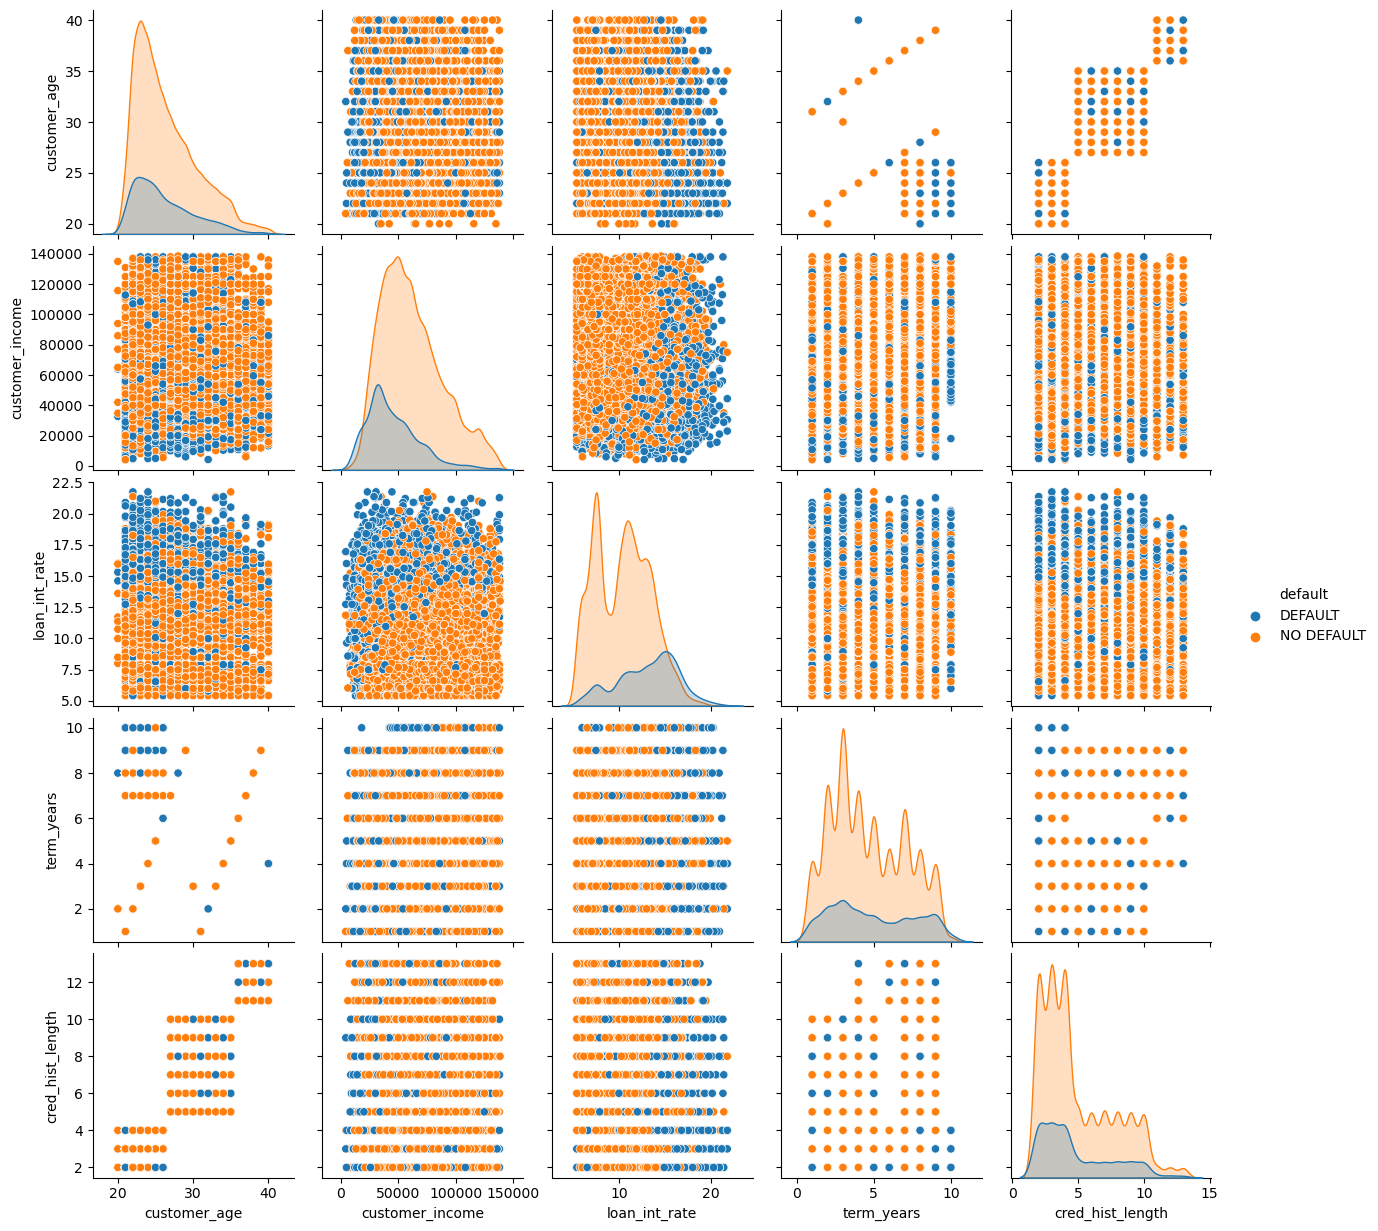

In [21]:
# Create a pairplot of the data
sns.pairplot(loan_data, hue='default')

# Show the plot
plt.show()

#### 3.4.1 Bivariate analysis
> * Customer income and loan interest rate showa a weak negative correlation exists, suggesting higher earners might secure slightly lower interest rates.
> * Customer income and credit history length No clear correlation is visible.
> * Loan interest rate and credit history length has Some potential for a negative correlation, implying longer credit history might lead to lower rates.

### 3.5 Multivariate analysis

In [22]:
correlation_matrix = num_col.corr()
correlation_matrix

,customer_age,customer_income,loan_int_rate,term_years,cred_hist_length
customer_age,1.000000,0.100016,0.008285,0.201639,0.789280
customer_income,0.100016,1.000000,-0.034865,0.092801,0.064001
loan_int_rate,0.008285,-0.034865,1.000000,0.042388,0.012773
term_years,0.201639,0.092801,0.042388,1.000000,0.247614
cred_hist_length,0.789280,0.064001,0.012773,0.247614,1.000000


#### 3.5.1 Correlation matrix analyis
> * Strong Positive Correlation in customer_age and cred_hist_length have a strong positive correlation (0.79). This suggests that older customers tend to have longer credit histories.
> * Weak Positive Correlation in customer_age and term_years have a weak positive correlation  and customer_income and term_years have a weak positive correlation


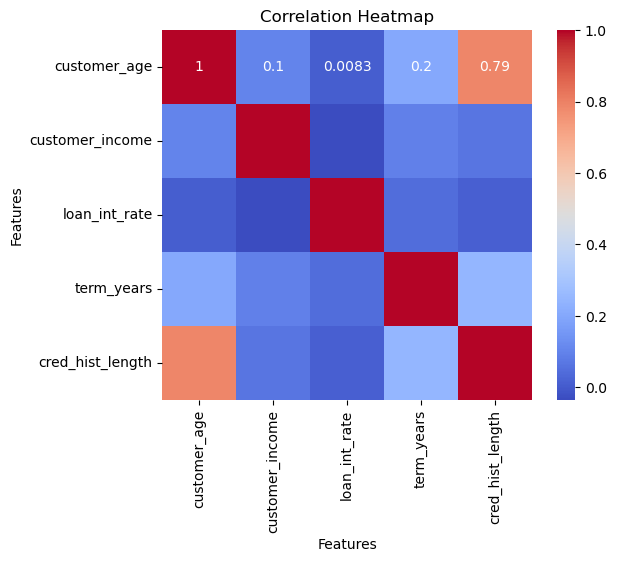

In [23]:
sns.heatmap(num_col.corr(), annot=True, cmap='coolwarm', square=True)

# Customize the plot (optional)
plt.title('Correlation Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')

# Show the plot
plt.show()

## 4. Modelling

In [24]:
# import modelling libraries
import sklearn
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV 
from imblearn.over_sampling import SMOTE, SMOTENC
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,classification_report,ConfusionMatrixDisplay
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#### 4.1 Normalizing numerical data

This code will help in rescaling the numerical data using the StandardScaler making the data have a mean of 0 and a standard deviation of 1

Using one hot enconding to convert categorical data to numerical data

In [25]:
# Normaizing data
# Numerical columns
num_col = loan_data.select_dtypes(include= ["int64", "float"]).columns
# create an instance of the scaler
scaler = StandardScaler()

# transforming the data
loan_data[num_col] = scaler.fit_transform(loan_data[num_col])

In [26]:
# Encoding the target variable 'default'
label_encoder = LabelEncoder()
loan_data['default'] = label_encoder.fit_transform(loan_data['default'])

In [27]:
# preview unique values in the dataset
loan_data["default"].nunique()

2

In [28]:
# 1. Separate the target variable (Assuming 'default' is your target column)
y = loan_data['default']  # Target variable
X = loan_data.drop('default', axis=1)  # Drop the target column from the features

# 2. Apply one-hot encoding to the categorical columns (excluding the target variable)
categ_col = X.select_dtypes(include=["object", "bool"]).columns
X = pd.get_dummies(X, columns=categ_col, drop_first=True)

# 3. Rejoin the target variable back to the dataset (if needed)
loan_data1 = X.copy()
loan_data1['default'] = y  # Adding the target variable back to the features (if needed)

# Display the first five rows to check the result
loan_data1.head()


,customer_age,customer_income,loan_int_rate,term_years,cred_hist_length,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,default
0,-1.066120,0.031980,1.555823,2.165582,-0.694005,False,False,True,False,False,False,True,False,False,True,False,False,0
1,-1.311882,-1.796220,0.045197,-1.512413,-1.058069,False,True,False,True,False,False,False,False,False,False,False,False,1
2,-0.328833,-1.796220,0.580726,0.122252,-0.694005,False,False,False,False,False,True,False,False,True,False,False,False,0
3,-0.820358,0.272533,1.311275,2.165582,-1.058069,False,False,True,False,False,True,False,False,True,False,False,False,0
4,-0.574595,-0.138257,1.014103,2.165582,-0.329942,False,False,True,False,False,True,False,False,True,False,False,False,0


#### 4.2 Preprocessing the data

For uniformity in my models i will use a test size of 30% and random_state of 42

In [29]:
# Assign X and y
X = loan_data1.drop('default', axis=1)
y = loan_data1['default']
# train test split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [30]:
# dealng with class imabalance
display(loan_data1["default"].value_counts())

default
1    20072
0     5631
Name: count, dtype: int64

In [31]:
# using smote to deal with target data imbalance issues
print("using smote to balance the classes")
smote = SMOTE(random_state=42)
X_train_resample, y_train_resample = smote.fit_resample(X_train, y_train)
y_train_resample.value_counts()

using smote to balance the classes


default
1    14035
0    14035
Name: count, dtype: int64

#### 4.3 Models to be used for analysis
> * Logistic regression model
> * Decision tree model
> * Random forest model

##### 4.3.1 Logistic regression Model
> Logistic regression is a technique used for binary classification problems. Its objective is to predict the likelihood that a given instance belongs to a particular class based on its independent variables

In [32]:
# instaniate logistic regression model
logreg = LogisticRegression(random_state=42, max_iter=1000)
# Fit the model
logreg.fit(X_train_resample, y_train_resample)
# Make predictions
y_pred = logreg.predict(X_test)

In [33]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.75


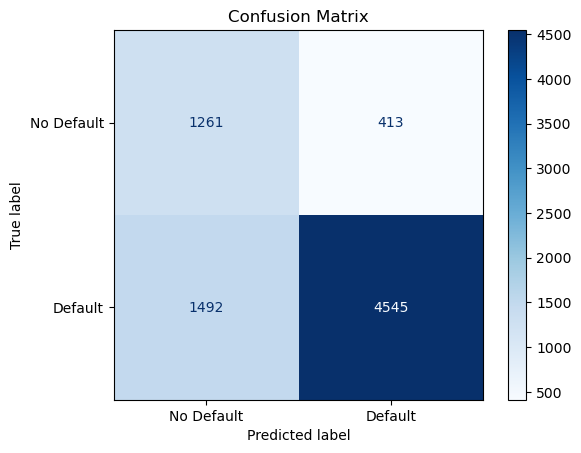

In [34]:
# plot the confusion matrix 
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Default', 'Default'])
disp.plot(cmap=plt.cm.Blues)

# Display the plot
plt.title('Confusion Matrix')
plt.show()

In [35]:
# display the classification report
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')

Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.75      0.57      1674
           1       0.92      0.75      0.83      6037

    accuracy                           0.75      7711
   macro avg       0.69      0.75      0.70      7711
weighted avg       0.82      0.75      0.77      7711



In [36]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Calculate precision
precision = precision_score(y_test, y_pred)
# Calculate recall
recall = recall_score(y_test, y_pred)
# Calculate F1-score
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")


Accuracy: 0.753
Precision: 0.917
Recall: 0.753
F1-score: 0.827


> The model shows good performance with 75.30% accuracy, indicating correct overall predictions. It has high precision (91.67%), meaning few false positives, but its recall (75.29%) suggests it misses some "DEFAULT" cases. The balanced F1-score of 0.8267 reflects strong performance.

In [37]:
# Define a range of hyperparameters to search
param_grid = {
    'penalty': ['l2'],  
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  
}

# Creates a grid search object
grid_search = GridSearchCV(LogisticRegression(solver='liblinear', random_state=42), param_grid, cv=5, scoring='accuracy')

# Performs grid search on the resampled data
grid_search.fit(X_train_resample, y_train_resample)

# Gets the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Creates and trains the Logistic Regression model with the best hyperparameters
best_logistic_model = LogisticRegression(solver='liblinear', random_state=42, **best_params)
best_logistic_model.fit(X_train_resample, y_train_resample)

# Make predictions on the test data
y_pred = best_logistic_model.predict(X_test) 

# Print the best parameters
print("Best Parameters:")
for key, value in best_params.items():
    print(f"{key}: {value}")

# Print the best F1 score
best_f1_score = round(grid_search.best_score_, 3)
print("Best F1 Score:", best_f1_score)


Best Hyperparameters: {'C': 1, 'penalty': 'l2'}
Best Parameters:
C: 1
penalty: l2
Best F1 Score: 0.753


> The hyperparameters C=1 and penalty='l2' yield the highest F1-score (0.753), balancing precision and recall. This means the model is more effective at classifying true positives while minimizing false positives and false negatives.

### 4.3.2 Decision Tree Classifier

> Decision tree classifier splits data into branches based on feature conditions, creating a tree-like structure to classify outcomes. It's intuitive, interpretable, and handles non-linear relationships well.

In [38]:
# mapping the modek
# intitate the clasifier
dt_clf = DecisionTreeClassifier(random_state=42)
#Fit model
dt_clf.fit(X_train_resample,y_train_resample)
#predict model
y_pred_dt = dt_clf.predict(X_test)

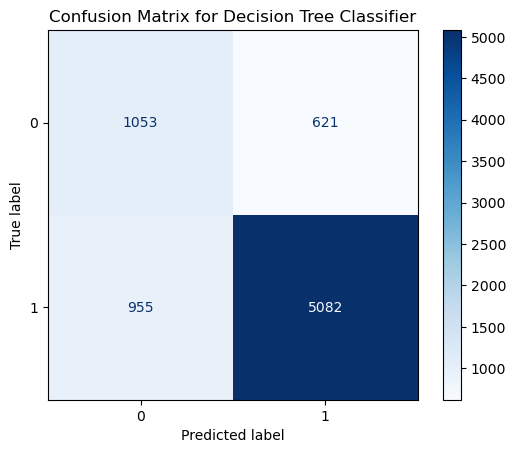

In [39]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.show()


In [40]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_dt)
print(f'The Accuracy of the model is: {accuracy:.2f}')

The Accuracy of the model is: 0.80


In [41]:
class_report = classification_report(y_test, y_pred_dt)
print(f'Classification Report:\n{class_report}')

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.63      0.57      1674
           1       0.89      0.84      0.87      6037

    accuracy                           0.80      7711
   macro avg       0.71      0.74      0.72      7711
weighted avg       0.81      0.80      0.80      7711



In [42]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_dt)
# Calculate precision
precision = precision_score(y_test, y_pred_dt)
# Calculate recall
recall = recall_score(y_test, y_pred_dt)
# Calculate F1-score
f1 = f1_score(y_test, y_pred_dt)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")


Accuracy: 0.796
Precision: 0.891
Recall: 0.842
F1-score: 0.866


> The model performs well with 79.6% accuracy, indicating a strong overall prediction rate. It has a precision of 89.1%, showing few false positives, while a recall of 84.2% suggests it effectively identifies most "DEFAULT" cases. The F1-score of 0.866 reflects balanced performance.

#### 4.3.2.1 Hyper-parameter Tuning For a Decision Tree Model
> This involves performs hyperparameter tuning on a decision tree model using grid search with 5-fold cross-validation to optimize accuracy and using the best parameters to fine tune the decision tree model

In [43]:
# Define the model
dt2_model = DecisionTreeClassifier()

# Define the parameter grid to search through
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

# Create a grid search object using 5-fold cross-validation and F1 score as the scoring metric
grid_search = GridSearchCV(estimator=dt2_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the resampled training data
grid_search.fit(X_train_resample, y_train_resample)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Print the best parameters and the best F1 score
print("Best Parameters:", best_params)
print("Best F1 Score:", grid_search.best_score_) 

Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best F1 Score: 0.8137513359458497


In [44]:
dt2_fined = DecisionTreeClassifier(criterion='gini', 
                                   max_depth=10,
                                   min_samples_leaf=1,
                                   min_samples_split=6)

# Fitting  model
dt2_fined.fit(X_train_resample, y_train_resample)

# Making predictions on the test data
dt2_y_pred = dt2_fined.predict(X_test)

# Evaluating the model
dt2_f1_score = f1_score(y_test, dt2_y_pred)
dt2_acc_score = accuracy_score(y_test, dt2_y_pred)
dt2_prec_score = precision_score(y_test, dt2_y_pred)
dt2_rec_score = recall_score(y_test, dt2_y_pred)

# Printing the results
print(f"Accuracy: {dt2_acc_score:.3f}")
print(f"Precision: {dt2_prec_score:.3f}")
print(f"Recall: {dt2_rec_score:.3f}")
print(f"F1 Score: {dt2_f1_score:.3f}")

Accuracy: 0.810
Precision: 0.907
Recall: 0.844
F1 Score: 0.874


> The model has an accuracy of 81%, meaning it correctly predicts most cases. Precision is 90.7%, indicating it has a high rate of correctly predicting "DEFAULT" cases without many false positives. With a recall of 84.4%, it effectively identifies most true positives. The F1 score of 0.875 shows a good balance between precision and recall.

### 4.3.3 Random Forest Classifier


In [45]:
# Create and train the Random Forest model
rf_clf = RandomForestClassifier(random_state=42)
#fit on the training data
rf_clf.fit(X_train_resample, y_train_resample)

# Make predictions on the test data
y_pred_rf = rf_clf.predict(X_test)


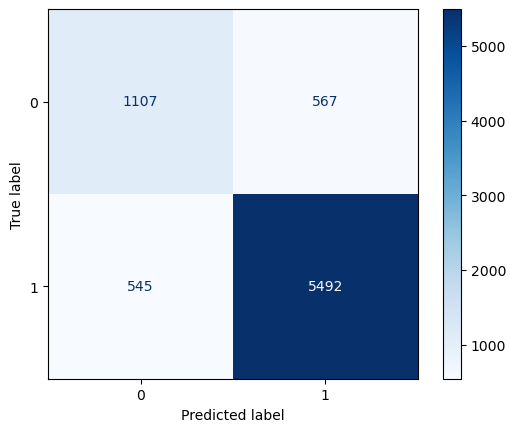

In [46]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_clf.classes_)
disp.plot(cmap=plt.cm.Blues)

# Show the plot
plt.show()

In [47]:
accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.86


In [48]:
class_report = classification_report(y_test, y_pred_dt)
print(f'Classification Report:\n{class_report}')

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.63      0.57      1674
           1       0.89      0.84      0.87      6037

    accuracy                           0.80      7711
   macro avg       0.71      0.74      0.72      7711
weighted avg       0.81      0.80      0.80      7711



In [49]:
# Make predictions on the test data using the tuned model
y_pred_rf = rf_clf.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
# Calculate precision
precision = precision_score(y_test, y_pred_rf)
# Calculate recall
recall = recall_score(y_test, y_pred_rf)
# Calculate F1-score
f1 = f1_score(y_test, y_pred_rf)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")

Accuracy: 0.856
Precision: 0.906
Recall: 0.910
F1-score: 0.908


> The model has an accuracy of 85.58%, indicating it correctly classifies most instances. Precision of 90.64% suggests that when predicting the positive class, it is highly accurate. Recall of 90.97% means it captures almost all true positives. The F1-score of 90.81% balances precision and recall well.

#### 4.3.3.1 Hyper-parameter Tuning For a Random Forest Model
> This involves performs hyperparameter tuning on a Random Forest model using grid search with 5-fold cross-validation to optimize accuracy and using the best parameters to fine tune the Random Forest model

In [50]:


# Define the parameter distributions
param_dist = {
    'n_estimators': np.arange(100, 300, 50),
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a RandomizedSearchCV object with 5-fold cross-validation
random_search = RandomizedSearchCV(rf_clf, param_distributions=param_dist, n_iter=10, cv=5, scoring='f1', n_jobs=-1, random_state=42)

# Fit the model
random_search.fit(X_train_resample, y_train_resample)

# Get the best parameters
best_params_random = random_search.best_params_
best_score_random = random_search.best_score_

# Print the results
print("Best Parameters from Randomized Search:")
for param, value in best_params_random.items():
    print(f"{param}: {value}")
print(f"Best Score: {best_score_random:.3f}")


Best Parameters from Randomized Search:
n_estimators: 150
min_samples_split: 5
min_samples_leaf: 1
max_depth: 15
Best Score: 0.873


In [51]:
# Train the random forest classifier
rf2 = RandomForestClassifier(n_estimators=150,
                             random_state=42,
                             max_depth=15,
                             min_samples_leaf=1,
                             min_samples_split=5)
rf2.fit(X_train_resample, y_train_resample)

# Make predictions on the test data
rf2_y_pred = rf2.predict(X_test)

# Evaluate the model's accuracy
rf2_f1_score = round(f1_score(y_test, rf2_y_pred), 3)
rf2_acc_score = round(accuracy_score(y_test, rf2_y_pred), 3)
rf2_prec_score = round(precision_score(y_test, rf2_y_pred), 3)
rf2_rec_score = round(recall_score(y_test, rf2_y_pred), 3)

# printing the scores
print(f'Accuracy: {rf2_acc_score}')
print(f'Precision: {rf2_prec_score}')
print(f'Recall: {rf2_rec_score}')
print(f'F1 Score: {rf2_f1_score}')

Accuracy: 0.845
Precision: 0.918
Recall: 0.881
F1 Score: 0.899


> The model has an accuracy of 84.5%, showing good overall performance. With a precision of 91.8%, it predicts the positive class accurately. The recall of 88.1% captures most true positives, and the F1 score of 89.9% indicates a good balance.

## 5 Model Comparison Analysis

### 5.1 Model analysis

#### 5.1.1 Logistic Regression
- **Accuracy**: 0.753
- **Precision**: 0.917
- **Recall**: 0.753
- **F1-score**: 0.827

#### 5.1.2 Decision Tree
- **Accuracy**: 0.810
- **Precision**: 0.907
- **Recall**: 0.844
- **F1 Score**: 0.875

#### 5.1.3 Random Forest
- **Accuracy**: 0.845
- **Precision**: 0.918
- **Recall**: 0.881
- **F1 Score**: 0.899

---

### 5.2 Analysis Explanation:
1. **Accuracy**:
   - Random Forest has the highest accuracy (0.845), followed by Decision Tree (0.810), and Logistic Regression (0.753).
   - This indicates that Random Forest is the most reliable model in terms of overall classification performance.

2. **Precision**:
   - Random Forest and Logistic Regression both have high precision (0.918 and 0.917 respectively).
   - Precision reflects the model's ability to correctly predict positive cases. Both models perform almost equally well here.

3. **Recall**:
   - Random Forest outperforms the other models with a recall of 0.881, indicating it identifies the most true positives.
   - Decision Tree also performs well with a recall of 0.844, while Logistic Regression has a lower recall of 0.753.

4. **F1 Score**:
   - Random Forest leads with an F1 score of 0.899, followed by Decision Tree (0.875), and Logistic Regression (0.827).
   - The F1 score represents a balance between precision and recall, and here, Random Forest maintains the best balance between both metrics.

---

### 5.3 Conclusion:
Based on the analysis, **Random Forest** emerges as the best model, with the highest accuracy, recall, and F1 score. It provides the best balance between identifying true positives and maintaining overall classification accuracy. Therefore, **Random Forest** would be the recommended model for this task.
